In [4]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
import zipfile


file = '/Users/huynhphuong/Desktop/CAMCOS-after-semester/Data/confirmed-failed-txn.csv.zip'
file = zipfile.ZipFile(file) 
table = pd.read_csv(file.open('confirmed-failed-txn.csv'))
table


,Unnamed: 0,detecttime,hash,status,region,reorg,replace,curblocknumber,failurereason,blockspending,...,fromaddress,input,type,maxpriorityfeepergas,maxfeepergas,basefeepergas,dropreason,rejectionreason,gasused,detect_date
0,0,2023-09-04T00:00:00.393Z,0x72e877a7fe0d05b4dde2375a84befbd60c60d1e1ee1c...,confirmed,us-east-1,NaN,NaN,18059398,none,1.0,...,0xa4625cebb073fe90bfb32fe006a8fc12e7a28f93,0x161ac21f00000000000000000000000046974afd272a...,2.0,1.000000e+08,1.528617e+10,9.871473e+09,NaN,NaN,101826.0,2023-09-04
1,1,2023-09-04T00:00:00.393Z,0x60842e2b94484af5fdfcae05b43b7915ae5b15f5efed...,confirmed,us-east-1,NaN,NaN,18059398,none,2.0,...,0xa16ecef5e7c3761d1a7d8f2d72b3a7cf53f5dc13,0x3593564c000000000000000000000000000000000000...,2.0,7.732803e+07,1.319107e+10,9.871473e+09,NaN,NaN,178816.0,2023-09-04
2,2,2023-09-04T00:00:00.393Z,0xa3488cf10eaa710b3c2de7a224e64203cd4239dd0012...,confirmed,us-east-1,NaN,NaN,18059398,none,1.0,...,0x09363887a4096b142f3f6b58a7eed2f1a0ff7343,0xa9059cbb000000000000000000000000d5e9f3bf3a64...,2.0,2.001000e+09,9.990000e+11,9.871473e+09,NaN,NaN,34752.0,2023-09-04
3,3,2023-09-04T00:00:00.393Z,0xa313f64ff63d2fde593ddc9c57c23bebc3f7e9feec1e...,confirmed,us-east-1,NaN,NaN,18059398,none,1.0,...,0x212217648798664b55d4e883351f0110f2c9164c,0x,2.0,2.000000e+09,2.500000e+11,9.871473e+09,NaN,NaN,21000.0,2023-09-04
4,4,2023-09-04T00:00:00.393Z,0xf9204a16001b34d8adaae4769883f6fefc025be8ff8e...,confirmed,us-east-1,NaN,NaN,18059398,none,1.0,...,0x390a7731bb3573617c59060c6b3764664f15dada,0x3593564c000000000000000000000000000000000000...,2.0,3.000000e+08,1.942332e+10,9.871473e+09,NaN,NaN,115903.0,2023-09-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435024,435024,2023-09-07T23:59:48.467Z,0x892f80298ff5d01ee1647f9af238498fcd71198832db...,confirmed,us-east-1,NaN,NaN,18087985,none,0.0,...,0xa967266d4ef3bc4c9e9d941ce0377e664831a5e8,0xb6f9de95000000000000000000000000000000000000...,2.0,2.300000e+10,4.255408e+10,1.284868e+10,NaN,NaN,136857.0,2023-09-07
435025,435025,2023-09-07T23:59:48.467Z,0x2502b907f133cdf59538d2aec002915f50a96425ccd9...,confirmed,us-east-1,NaN,NaN,18087985,none,0.0,...,0xcd2c7276d85c526bcb5070295c25c61b16048c07,0x791ac947000000000000000000000000000000000000...,2.0,3.000000e+09,2.255408e+10,1.284868e+10,NaN,NaN,148689.0,2023-09-07
435026,435026,2023-09-07T23:59:48.467Z,0x3661186c81112352e8bf37aa34362d1f0a44896a61e4...,confirmed,us-east-1,NaN,NaN,18087985,none,0.0,...,0x425a4a539c085ff2568e19ee1304e97a92688959,0x0000000020000000035b1ef649c1eb03da091b3c282a...,2.0,1.776772e+10,3.061640e+10,1.284868e+10,NaN,NaN,181028.0,2023-09-07
435027,435027,2023-09-07T23:59:59.986Z,0x9c6bb76aea8f0bb37858c6aef0f8d3a1976fe5d235f0...,confirmed,us-east-1,NaN,NaN,18087986,none,0.0,...,0x5638cbdc72bd8554055883d309cfc70357190cf3,0x,2.0,0.000000e+00,1.287302e+10,1.287302e+10,NaN,NaN,21000.0,2023-09-07


In [5]:
table.columns

Index(['Unnamed: 0', 'detecttime', 'hash', 'status', 'region', 'reorg',
       'replace', 'curblocknumber', 'failurereason', 'blockspending',
       'timepending', 'nonce', 'gas', 'value', 'toaddress', 'fromaddress',
       'input', 'type', 'maxpriorityfeepergas', 'maxfeepergas',
       'basefeepergas', 'dropreason', 'rejectionreason', 'gasused',
       'detect_date'],
      dtype='object')

## Dropping unncessary columns

In [7]:
if "Unnamed: 0" in table.columns:
    table = table.drop(columns = ["Unnamed: 0"])
table = table.drop(columns = ["region","reorg","replace","failurereason",
                              "nonce","type","dropreason","rejectionreason"])

table.head(4)

,detecttime,hash,status,curblocknumber,blockspending,timepending,gas,value,toaddress,fromaddress,input,maxpriorityfeepergas,maxfeepergas,basefeepergas,gasused,detect_date,hour
0,2023-09-04T00:00:00.393Z,0x72e877a7fe0d05b4dde2375a84befbd60c60d1e1ee1c...,confirmed,18059398,1.0,8284.0,109585.0,0,0x00005ea00ac477b1030ce78506496e8c2de24bf5,0xa4625cebb073fe90bfb32fe006a8fc12e7a28f93,0x161ac21f00000000000000000000000046974afd272a...,1.000000e+08,1.528617e+10,9.871473e+09,101826.0,2023-09-04,00
1,2023-09-04T00:00:00.393Z,0x60842e2b94484af5fdfcae05b43b7915ae5b15f5efed...,confirmed,18059398,2.0,12414.0,247993.0,50000000000000000,0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad,0xa16ecef5e7c3761d1a7d8f2d72b3a7cf53f5dc13,0x3593564c000000000000000000000000000000000000...,7.732803e+07,1.319107e+10,9.871473e+09,178816.0,2023-09-04,00
2,2023-09-04T00:00:00.393Z,0xa3488cf10eaa710b3c2de7a224e64203cd4239dd0012...,confirmed,18059398,1.0,7764.0,300000.0,0,0x7420b4b9a0110cdc71fb720908340c03f9bc03ec,0x09363887a4096b142f3f6b58a7eed2f1a0ff7343,0xa9059cbb000000000000000000000000d5e9f3bf3a64...,2.001000e+09,9.990000e+11,9.871473e+09,34752.0,2023-09-04,00
3,2023-09-04T00:00:00.393Z,0xa313f64ff63d2fde593ddc9c57c23bebc3f7e9feec1e...,confirmed,18059398,1.0,6997.0,21000.0,75264931026174187,0xf89d7b9c864f589bbf53a82105107622b35eaa40,0x212217648798664b55d4e883351f0110f2c9164c,0x,2.000000e+09,2.500000e+11,9.871473e+09,21000.0,2023-09-04,00


# Questions: 
    1. How do the peak hours affect base fee and mempool traffic. 
        In these 3 days, what is the
            a. Mean gas included in each block over 24 hours?
            b. Base fee over 24 hours?
            c. Includable gas over 24 hours? 
    2. 
    
### Add a hour column of which hour the block is confirmed

In [8]:
hour = [i[11:13] for i in table.detecttime]
table['hour'] = hour
table.head(4)

,detecttime,hash,status,curblocknumber,blockspending,timepending,gas,value,toaddress,fromaddress,input,maxpriorityfeepergas,maxfeepergas,basefeepergas,gasused,detect_date,hour
0,2023-09-04T00:00:00.393Z,0x72e877a7fe0d05b4dde2375a84befbd60c60d1e1ee1c...,confirmed,18059398,1.0,8284.0,109585.0,0,0x00005ea00ac477b1030ce78506496e8c2de24bf5,0xa4625cebb073fe90bfb32fe006a8fc12e7a28f93,0x161ac21f00000000000000000000000046974afd272a...,1.000000e+08,1.528617e+10,9.871473e+09,101826.0,2023-09-04,00
1,2023-09-04T00:00:00.393Z,0x60842e2b94484af5fdfcae05b43b7915ae5b15f5efed...,confirmed,18059398,2.0,12414.0,247993.0,50000000000000000,0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad,0xa16ecef5e7c3761d1a7d8f2d72b3a7cf53f5dc13,0x3593564c000000000000000000000000000000000000...,7.732803e+07,1.319107e+10,9.871473e+09,178816.0,2023-09-04,00
2,2023-09-04T00:00:00.393Z,0xa3488cf10eaa710b3c2de7a224e64203cd4239dd0012...,confirmed,18059398,1.0,7764.0,300000.0,0,0x7420b4b9a0110cdc71fb720908340c03f9bc03ec,0x09363887a4096b142f3f6b58a7eed2f1a0ff7343,0xa9059cbb000000000000000000000000d5e9f3bf3a64...,2.001000e+09,9.990000e+11,9.871473e+09,34752.0,2023-09-04,00
3,2023-09-04T00:00:00.393Z,0xa313f64ff63d2fde593ddc9c57c23bebc3f7e9feec1e...,confirmed,18059398,1.0,6997.0,21000.0,75264931026174187,0xf89d7b9c864f589bbf53a82105107622b35eaa40,0x212217648798664b55d4e883351f0110f2c9164c,0x,2.000000e+09,2.500000e+11,9.871473e+09,21000.0,2023-09-04,00


## Data Processing

In [9]:
#get current block numbers
curblocknumber = table.curblocknumber.values

#get dates
detect_date = table.detect_date.values

#get hours
hour = table.hour.values

#get basefeepergas
basefeepergas = (table.basefeepergas.values)/1e9

#get total txns gas in 
blocksize = table[table.status == "confirmed"].groupby("curblocknumber").gasused.sum()

# # zip together the two arrays and remove duplicates
zipped = list(zip(detect_date, curblocknumber, basefeepergas,hour))
zipped = list(set(zipped))

# sort zipped by curblocknumber
zipped.sort(key=lambda x: x[1:2])
detect_date, curblocknumber, basefeepergas, hour = zip(*zipped)

# Check if curblocknumber is monotonic increasing and sequential (should be true)
print("Is curblocknumber monotonic increasing?", np.all(np.diff(curblocknumber) > 0))
print("Is curblocknumber sequential (no gaps)?", np.all(np.diff(curblocknumber) == 1))



Is curblocknumber monotonic increasing? True
Is curblocknumber sequential (no gaps)? False


## Fill missing blocks with values of the adjacent blocks

In [10]:
gap = np.array(range(min(curblocknumber),max(curblocknumber)+1,1))
missing_block_1 = [i for i in gap if i not in curblocknumber]
missing_block_2 = [i for i in list(curblocknumber) if i not in blocksize.index]

curblocknumber = list(curblocknumber)
detect_date = list(detect_date)
basefeepergas = list(basefeepergas)
hour = list(hour)
blocksize = list(blocksize.index)

for i in gap:
    if i not in curblocknumber:
        index = np.where(gap == i)[0][0]
        
        #insert block number
        curblocknumber.insert(int(index),i)
        
        #insert detect_date
        detect_date.insert(int(index), detect_date[index-1])
    
        # insert basefeepergas
        basefeepergas.insert(int(index), basefeepergas[index-1])
        
         # insert hour
        hour.insert(int(index), hour[index-1])
        
         # insert blocksize
        blocksize.insert(int(index),0)
    if i in missing_block_2:
        blocksize.insert(int(index),0)
        
    
# # # Check if curblocknumber is monotonic increasing and sequential (should be true)
# # curblocknumber = np.array(curblocknumber)
print("Is curblocknumber monotonic increasing?", np.all(np.diff(curblocknumber) > 0))
print("Is curblocknumber sequential (no gaps)?", np.all(np.diff(curblocknumber) == 1))

Is curblocknumber monotonic increasing? True
Is curblocknumber sequential (no gaps)? True


## Creating mempool includable gas per block (exclude private txns)


In [230]:
df = table.copy()
df = df[df.timepending > 0]
df.curblocknumber.unique()

array([18066560, 18066561, 18066602, 18066604, 18066605, 18066606,
       18066609, 18066658, 18066692, 18066702, 18067035, 18067056,
       18067102, 18067342, 18067405, 18067406, 18067413, 18067805,
       18067860, 18067878, 18067882, 18067886, 18067895, 18067899,
       18067916, 18067928, 18067933, 18067940, 18067949, 18067980,
       18067984, 18067989, 18067995, 18068000, 18068011, 18068017,
       18068531])

In [11]:
curblocknumber = np.array(curblocknumber)
basefeepergas = np.array(basefeepergas)

# gpb  = np.zeros(len(curblocknumber))     # gas per block (uses column 'gas')
gupb = np.zeros(len(curblocknumber))       # gas used per block (uses column 'gasused')
txns = np.zeros(len(curblocknumber))       # includable transactions per block (increases whenever a transaction is considered includable (MFPG >= BFPB))
offset = curblocknumber[0]                 # hold the first block number


df = table.copy()
# For each txn
for index, row in table.iterrows():
    on_block = row['curblocknumber']     # get the block number that the txn is included in
    on_block_index = on_block - offset   # subtract the first block number to get index of that block

    first_block = on_block - row['blockspending'] # get the number of blocks when the transaction is first pending 
    first_block_index = first_block - offset      # get the block number when the transaction is first pending
    
    first_block_index = first_block_index.astype(int) #subtract turn value into float, convert back to int
    

    # if the first block is negative, set it to 0 
    # (txns that were pending before our sample started but finalized during our sample)
    if first_block_index < 0:
        first_block_index = 0

    # # NEW: Make the assumption that blocks are generally not considered includable until the next block after entering the mempool    
    if first_block_index < on_block_index:   
        first_block_index += 1
    
    # for each block that the transaction was pending, if it is includable then add the gas to the GPB array, etc
    
    for block_index in range(first_block_index, on_block_index + 1):
        # if the transaction is includable in the block
#             gpb[block_index] += row['gas']      # add the gas to the GPB array for the block (using column gas)
        gupb[block_index] += row['gasused'] # add the gas used to the GUPB array for the block (using column gasused)
        txns[block_index] += 1              # increment the txns count for the block  


/var/folders/h_/l0mmmvfx0d76bdhlc278_vs40000gn/T/ipykernel_9348/3730360613.py:19: RuntimeWarning: invalid value encountered in cast
  first_block_index = first_block_index.astype(int) #subtract turn value into float, convert back to int


In [13]:
import pickle

# store in pickle file
with open('includable_gas_arrays.pickle', 'wb') as f:
    pickle.dump((detect_date, curblocknumber, hour,basefeepergas, blocksize,gupb,txns), f)

In [14]:
# with open('includable_gas_arrays.pickle', 'rb') as f:
#     detect_date, curblocknumber, hour,basefeepergas, blocksize,gupb,txns = pickle.load(f)
    
    

## Reading Files

1. basefee over hours 
2. mean gas included in blocks over hours 
3. mempool includable gas over hours 

In [15]:
per_hour = pd.DataFrame({"detect_date": detect_date,
                         "curblocknumber": curblocknumber, 
                         "gupb": tuple(gupb), 
                         "hour": hour, 
                         "basefeepergas":basefeepergas,
                        "blocksize":blocksize,
                        "txn_numbers": tuple(txns)})
per_hour

,detect_date,curblocknumber,gupb,hour,basefeepergas,blocksize,txn_numbers
0,2023-09-04,18059398,6.433383e+06,00,9.871473,18059398,66.0
1,2023-09-04,18059399,2.901660e+09,00,9.263729,18059399,13860.0
2,2023-09-04,18059400,2.895565e+09,00,10.006968,18059400,13824.0
3,2023-09-04,18059401,2.882847e+09,00,11.047238,18059401,13831.0
4,2023-09-04,18059402,2.880999e+09,00,10.817232,18059402,13823.0
...,...,...,...,...,...,...,...
28584,2023-09-07,18087982,6.101856e+06,23,12.749047,18087982,43.0
28585,2023-09-07,18087983,1.389046e+06,23,13.422195,18087983,10.0
28586,2023-09-07,18087984,4.219340e+06,23,13.036055,18087984,20.0
28587,2023-09-07,18087985,1.545021e+06,23,12.848676,18087985,11.0


In [16]:
basefee_per_hour = per_hour.groupby(["hour","detect_date"]).basefeepergas.mean().unstack()
includable_gas_per_hour = per_hour.groupby(["hour","detect_date"]).gupb.mean().unstack()
blocksize_per_hour = per_hour.groupby(["hour","detect_date"]).blocksize.mean().unstack()
number_txns_per_hour = per_hour.groupby(["hour","detect_date"]).txn_numbers.mean().unstack()

Text(0.5, 1.0, 'number of txns per hour')

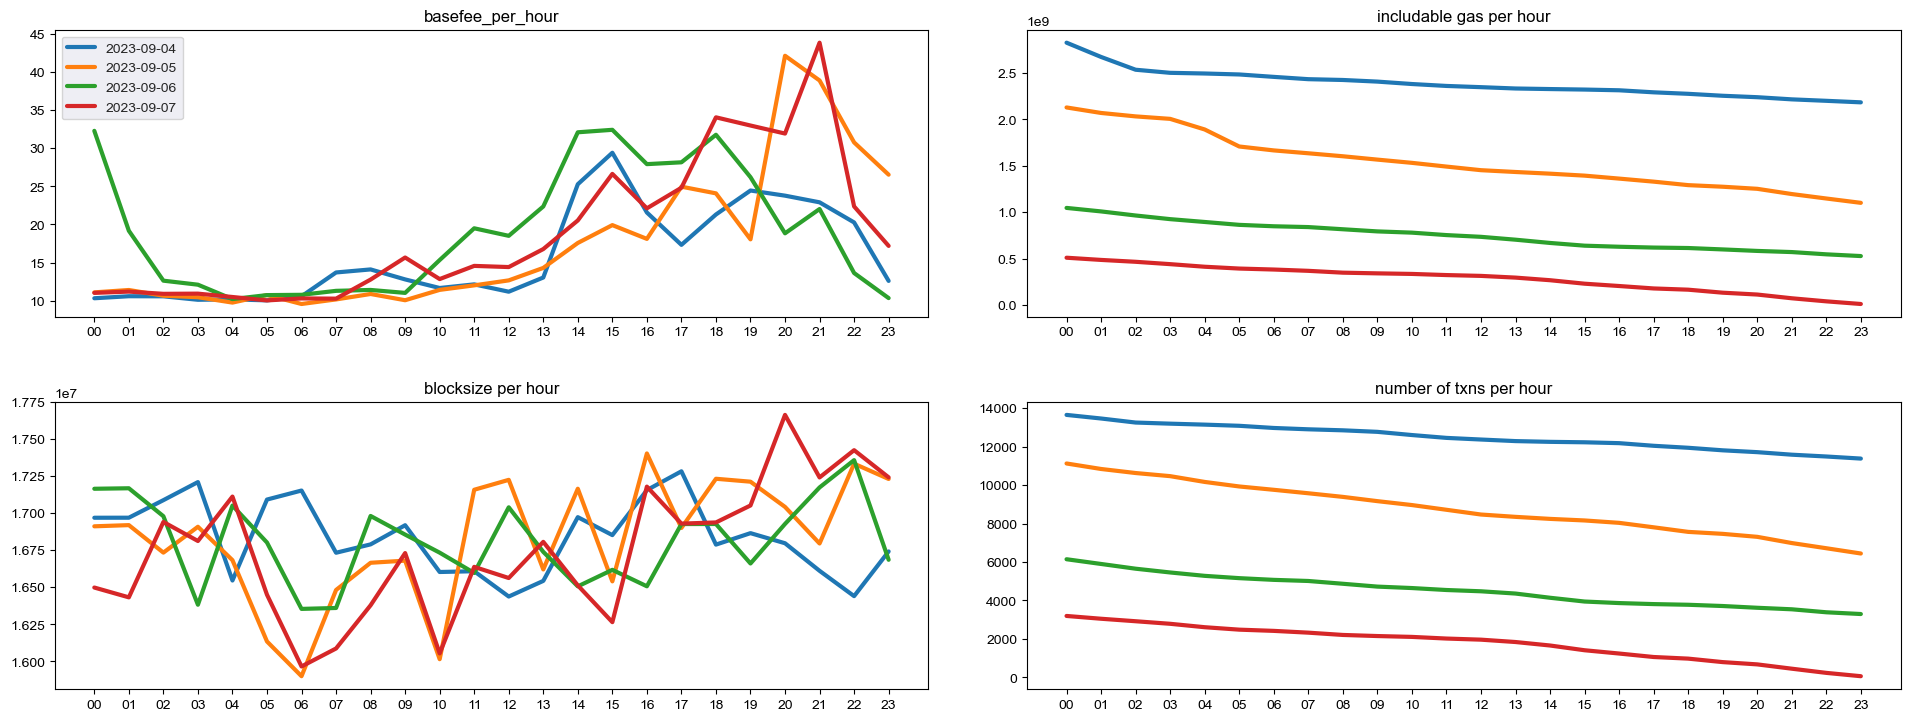

In [17]:
fig, ax = plt.subplots(2,2,figsize=(20,8))

# using padding to create gap between plots
fig.tight_layout(pad=4.0)   
sns.set_style('darkgrid')

ax[0,0].plot(basefee_per_hour, linewidth=3)
ax[0,0].set_title("basefee_per_hour")
ax[0,0].legend(basefee_per_hour.columns, loc = 2)

ax[0,1].plot(includable_gas_per_hour,linewidth=3)
ax[0,1].set_title("includable gas per hour")

ax[1,0].plot(blocksize_per_hour,linewidth=3)
ax[1,0].set_title("blocksize per hour")

ax[1,1].plot(number_txns_per_hour,linewidth=3)
ax[1,1].set_title("number of txns per hour")
# ax[0].legend(number_txns_per_hour.columns)




### During peak hours, 3-9pm:
- The basefee reaches the highest
- The blocksizes are also the largest (more includable gas in the block)
- The Mempool includable gas decreases during the peak hour, many txns are priced out
- Number of txns in the mempool per block decreases (less number of txns )


### Therefore, during peak hours:
- Less txns go to the mempool, 
- But, why included gas per block is still high.
- One possibility, private txns!

In [158]:
# with open('includable_gas_arrays.pickle', 'rb') as f:
#     detect_date, curblocknumber, hour,basefeepergas, blocksize,gupb,txns=  pickle.load(f)

In [18]:
private = table[table.timepending == 0]
private = private.groupby(["hour",'detect_date']).timepending.count()

private

hour  detect_date
00    2023-09-04     4192
      2023-09-05     4898
      2023-09-06     6252
      2023-09-07     3587
01    2023-09-04     4270
                     ... 
22    2023-09-07     5671
23    2023-09-04     3429
      2023-09-05     5613
      2023-09-06     3546
      2023-09-07     5578
Name: timepending, Length: 96, dtype: int64

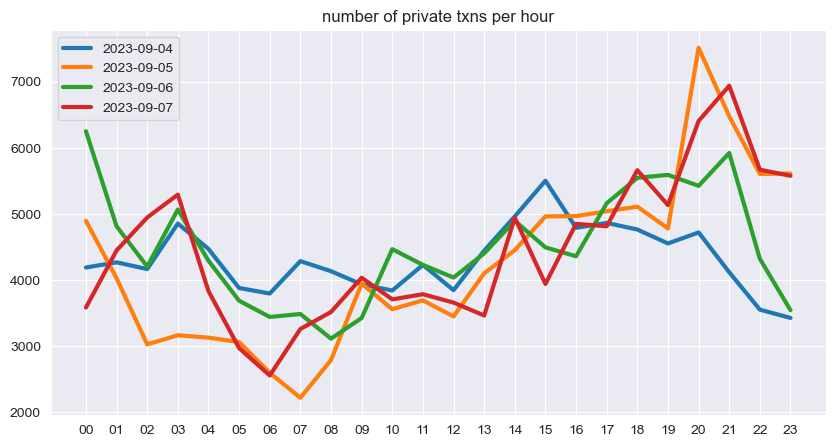

In [19]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(private.unstack(),linewidth=3)
ax.set_title("number of private txns per hour")
ax.legend(number_txns_per_hour.columns,loc =2);

This explains why more txns included in the blocks, but not in the mempool during peak hours. 
Why is that?